# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/segmentation data.csv')
df_info = df.copy()

In [3]:
df.sample(2)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
51,100000052,0,0,30,0,180196,2,2
1768,100001769,1,0,31,0,72361,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


# Preprocess

In [6]:
df['Sex'] = df['Sex'].apply(lambda x: 'male' if x==0 else 'female')
df['Marital status'] = df['Marital status'].apply(lambda x: 'single' if x==0 else 'non-single')
df['Education'] = df['Education'].apply(lambda x: 'other/unknow' if x==0 else ('high school' if x==1 else ('university' if x==2 else 'graduate school')))
df['Occupation'] = df['Occupation'].apply(lambda x: 'unemployed' if x==0 else ('skilled employee' if x==1 else 'management'))
df['Settlement size'] = df['Settlement size'].apply(lambda x: 'small city' if x==0 else ('mid-sized city' if x==1 else 'big city'))

# Descriptive Analytics 

## Univariate Analytics


### Univariate Frequencies

##### Sex

In [7]:
sex = df.Sex.value_counts().to_list()
df_sex = pd.DataFrame({'Sex': ['male', 'female'] ,'Abs.freq' : sex})
# df_sex.set_index('Sex', inplace=True)

In [8]:
df_sex["Rel.freq"] = df_sex['Abs.freq']/sum(sex)*100
df_sex["Abs.cum.freq"] = df_sex["Abs.freq"].cumsum()
df_sex["Rel.cum.freq"] = df_sex["Rel.freq"].cumsum()

In [9]:
df_sex.head()

,Sex,Abs.freq,Rel.freq,Abs.cum.freq,Rel.cum.freq
0,male,1086,54.3,1086,54.3
1,female,914,45.7,2000,100.0


##### Marital status

In [10]:
Marital_status = df['Marital status'].value_counts().to_list()
df_Marital_status = pd.DataFrame({'Marital Status': ['single', 'non-single'] ,'Abs.freq' : Marital_status})
# df_Marital_status.set_index('Marital status', inplace=True)

In [11]:
df_Marital_status["Rel.freq"] = df_Marital_status['Abs.freq']/sum(sex)*100
df_Marital_status["Abs.cum.freq"] = df_Marital_status["Abs.freq"].cumsum()
df_Marital_status["Rel.cum.freq"] = df_Marital_status["Rel.freq"].cumsum()

In [12]:
df_Marital_status.head()

,Marital Status,Abs.freq,Rel.freq,Abs.cum.freq,Rel.cum.freq
0,single,1007,50.35,1007,50.35
1,non-single,993,49.65,2000,100.00


##### Age

sumber: https://www.banjarsari-labuhanhaji.desa.id/artikel/2022/6/10/kelompok-umur-balita-kanak-kanak-remaja-dewasa-dan-lanjut-usia

In [13]:
def Age(x):
  if 12 <= x <= 25:
    return 'Remaja'
  elif 26 <= x <= 45:
    return 'Dewasa'
  elif 46 <= x <= 65:
    return 'Lansia'
  else:
    return 'Manula'

In [14]:
df['Umur'] = df.Age.apply(Age)
# Umur = df.Umur.value_counts().to_dict()
Umur = {'Remaja': 362, 'Dewasa': 1248, 'Lansia': 345, 'Manula': 45}

In [15]:
df_Umur = pd.DataFrame.from_dict(Umur, orient='index', columns=['Abs.freq'])
df_Umur['Umur'] = df_Umur.index
df_Umur = df_Umur[['Umur', 'Abs.freq']]
df_Umur.reset_index(drop=True, inplace=True)

In [16]:
df_Umur["Rel.freq"] = df_Umur['Abs.freq']/sum(sex)*100
df_Umur["Abs.cum.freq"] = df_Umur["Abs.freq"].cumsum()
df_Umur["Rel.cum.freq"] = df_Umur["Rel.freq"].cumsum()

In [17]:
df_Umur.head()

,Umur,Abs.freq,Rel.freq,Abs.cum.freq,Rel.cum.freq
0,Remaja,362,18.10,362,18.10
1,Dewasa,1248,62.40,1610,80.50
2,Lansia,345,17.25,1955,97.75
3,Manula,45,2.25,2000,100.00


##### Education

In [18]:
# Education = df.Education.value_counts().to_dict()
Education = {'other/unknow': 287,
              'high school': 1386,
              'university': 291,
              'graduate school': 36}
df_Education = pd.DataFrame.from_dict(Education, orient='index', columns=['Abs.freq'])
df_Education['Education'] = df_Education.index
# df_Education = df_Education.sort_values(by=['Education'])
df_Education = df_Education[['Education', 'Abs.freq']]
df_Education.reset_index(drop=True, inplace=True)

In [19]:
df_Education["Rel.freq"] = df_Education['Abs.freq']/sum(sex)*100
df_Education["Abs.cum.freq"] = df_Education["Abs.freq"].cumsum()
df_Education["Rel.cum.freq"] = df_Education["Rel.freq"].cumsum()

<ipython-input-19-b72a679c8be5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Education["Rel.freq"] = df_Education['Abs.freq']/sum(sex)*100
<ipython-input-19-b72a679c8be5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Education["Abs.cum.freq"] = df_Education["Abs.freq"].cumsum()
<ipython-input-19-b72a679c8be5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [20]:
df_Education.head()

,Education,Abs.freq,Rel.freq,Abs.cum.freq,Rel.cum.freq
0,other/unknow,287,14.35,287,14.35
1,high school,1386,69.30,1673,83.65
2,university,291,14.55,1964,98.20
3,graduate school,36,1.80,2000,100.00


##### Income

In [21]:
def income(x):
  if 0 <= x <= 50000:
    return '0 - 50000'
  elif 50001 <= x <= 100000:
    return '50001 - 100000'
  elif 100001 <= x <= 150000:
    return '100001 - 150000'
  elif 150001 <= x <= 200000:
    return '150001 - 200000'
  elif 200001 <= x <= 250000:
    return '200001 - 250000'
  else:
    return '> 250000'

In [22]:
df['Range Income'] = df["Income"].apply(income)

In [23]:
# Income = df.Income.value_counts().to_dict()
Income = {'0 - 50000': 16,
          '50001 - 100000': 536,
          '100001 - 150000': 1095,
          '150001 - 200000': 274,
          '200001 - 250000': 55,
          '> 250000': 24}
df_Income = pd.DataFrame.from_dict(Income, orient='index', columns=['Abs.freq'])
df_Income['Income'] = df_Income.index
# df_Income = df_Income.sort_values(by=['Income'])
df_Income = df_Income[['Income', 'Abs.freq']]
df_Income.reset_index(drop=True, inplace=True)

In [24]:
df_Income["Rel.freq"] = df_Income['Abs.freq']/sum(sex)*100
df_Income["Abs.cum.freq"] = df_Income["Abs.freq"].cumsum()
df_Income["Rel.cum.freq"] = df_Income["Rel.freq"].cumsum()

In [25]:
df_Income.head(6)

,Income,Abs.freq,Rel.freq,Abs.cum.freq,Rel.cum.freq
0,0 - 50000,16,0.80,16,0.80
1,50001 - 100000,536,26.80,552,27.60
2,100001 - 150000,1095,54.75,1647,82.35
3,150001 - 200000,274,13.70,1921,96.05
4,200001 - 250000,55,2.75,1976,98.80
5,> 250000,24,1.20,2000,100.00


##### Occupation


In [26]:
# Occupation = df.Occupation.value_counts().to_dict()
Occupation = {'unemployed': 633, 'skill edemployee': 1113, 'management': 254}
df_Occupation = pd.DataFrame.from_dict(Occupation, orient='index', columns=['Abs.freq'])
df_Occupation['Occupation'] = df_Occupation.index
# df_Occupation = df_Occupation.sort_values(by=['Occupation'])
df_Occupation = df_Occupation[['Occupation', 'Abs.freq']]
df_Occupation.reset_index(drop=True, inplace=True)

In [27]:
df_Occupation["Rel.freq"] = df_Occupation['Abs.freq']/sum(sex)*100
df_Occupation["Abs.cum.freq"] = df_Occupation["Abs.freq"].cumsum()
df_Occupation["Rel.cum.freq"] = df_Occupation["Rel.freq"].cumsum()

In [28]:
df_Occupation.head()

,Occupation,Abs.freq,Rel.freq,Abs.cum.freq,Rel.cum.freq
0,unemployed,633,31.65,633,31.65
1,skill edemployee,1113,55.65,1746,87.30
2,management,254,12.70,2000,100.00


##### Settlement size

In [29]:
Settlement = df['Settlement size'].value_counts().to_dict()
df_Settlement = pd.DataFrame.from_dict(Settlement, orient='index', columns=['Abs.freq'])
df_Settlement['Settlement size'] = df_Settlement.index
# df_Settlement = df_Settlement.sort_values(by=['Settlement'])
df_Settlement = df_Settlement[['Settlement size', 'Abs.freq']]
df_Settlement.reset_index(drop=True, inplace=True)

In [30]:
df_Settlement["Rel.freq"] = df_Settlement['Abs.freq']/sum(sex)*100
df_Settlement["Abs.cum.freq"] = df_Settlement["Abs.freq"].cumsum()
df_Settlement["Rel.cum.freq"] = df_Settlement["Rel.freq"].cumsum()

In [31]:
df_Settlement.head()

,Settlement size,Abs.freq,Rel.freq,Abs.cum.freq,Rel.cum.freq
0,small city,989,49.45,989,49.45
1,mid-sized city,544,27.20,1533,76.65
2,big city,467,23.35,2000,100.00


  ### Univariate Data Visualization

#### Pie Chart

##### Sex

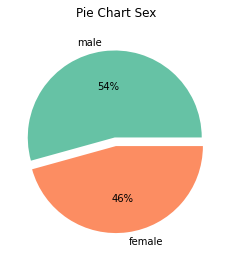

In [32]:
# declaring data
data = df_sex['Abs.freq']
keys = df_sex.Sex
  
# declaring exploding pie
explode = [0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette("Set2")
  
plt.title('Pie Chart Sex\n')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

##### Marital Status

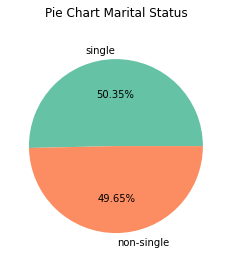

In [33]:
# declaring data
data = df_Marital_status['Rel.freq']
keys = df_Marital_status['Marital Status']
  
# declaring exploding pie
explode = [0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette("Set2")

plt.title('Pie Chart Marital Status\n')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.2f%%')
  
# displaying chart
plt.show()

##### Age

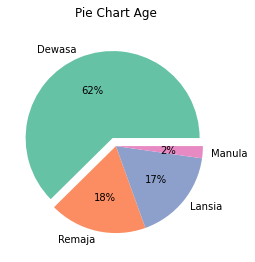

In [34]:
df_Umur = df_Umur.sort_values(by=['Abs.freq'], ascending=False)
# declaring data
data = df_Umur['Rel.freq']
keys = df_Umur['Umur']
  
# declaring exploding pie
explode = [0.1, 0, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette("Set2")
  
plt.title('Pie Chart Age\n')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

##### Education

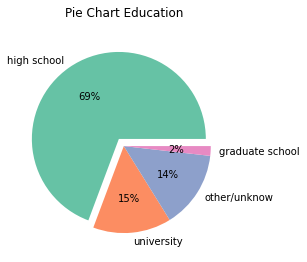

In [35]:
# declaring data
df_Education = df_Education.sort_values(by=['Abs.freq'], ascending=False)
data = df_Education['Rel.freq']
keys = df_Education['Education']
  
# declaring exploding pie
explode = [0.1, 0, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette("Set2")

plt.title('Pie Chart Education\n')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

##### Income

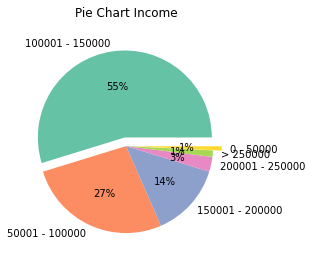

In [36]:
# declaring data
df_Income = df_Income.sort_values(by=['Abs.freq'], ascending=False)
data = df_Income['Rel.freq']
keys = df_Income['Income']
  
# declaring exploding pie
explode = [0.1, 0, 0, 0, 0, 0.1]
# define Seaborn color palette to use
palette_color = sns.color_palette("Set2")
  
plt.title('Pie Chart Income\n')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

##### Occupation

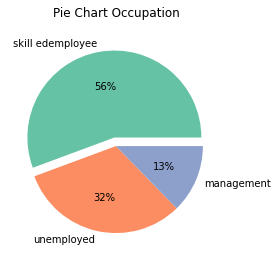

In [37]:
# declaring data
df_Occupation = df_Occupation.sort_values(by=['Abs.freq'], ascending=False)
data = df_Occupation['Rel.freq']
keys = df_Occupation['Occupation']
  
# declaring exploding pie
explode = [0.1, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette("Set2")
  
plt.title('Pie Chart Occupation\n')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

##### Settlement Size

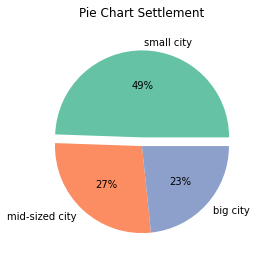

In [38]:
# declaring data
data = df_Settlement['Rel.freq']
keys = df_Settlement['Settlement size']
  
# declaring exploding pie
explode = [0.1, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette("Set2")
  
plt.title('Pie Chart Settlement\n')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

#### Bar Chart

##### Sex

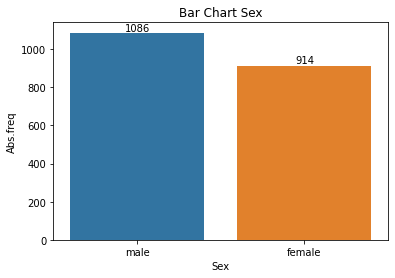

In [39]:
plt.title('Bar Chart Sex')
g = sns.barplot(data=df_sex, x="Sex", y="Abs.freq")
for i in g.containers:
    g.bar_label(i,)

##### Marital Status

In [40]:
df_Marital_status.head()

,Marital Status,Abs.freq,Rel.freq,Abs.cum.freq,Rel.cum.freq
0,single,1007,50.35,1007,50.35
1,non-single,993,49.65,2000,100.00


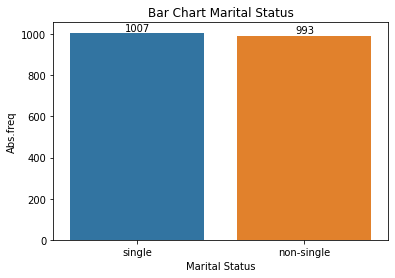

In [41]:
plt.title('Bar Chart Marital Status')
g = sns.barplot(data=df_Marital_status, x="Marital Status", y="Abs.freq")
for i in g.containers:
    g.bar_label(i,)

##### Age

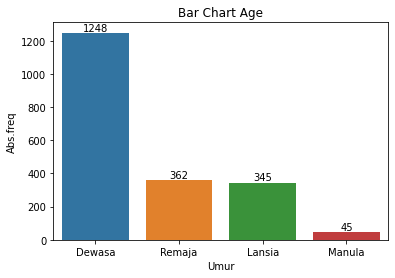

In [42]:
plt.title('Bar Chart Age')
g = sns.barplot(data=df_Umur, x="Umur", y="Abs.freq")
for i in g.containers:
    g.bar_label(i,)

##### Education

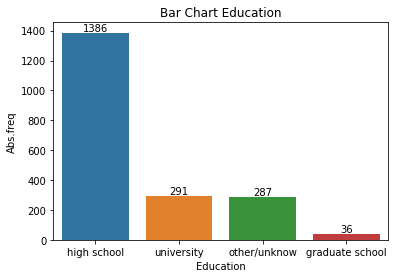

In [43]:
plt.title('Bar Chart Education')
g = sns.barplot(data=df_Education, x="Education", y="Abs.freq")
for i in g.containers:
    g.bar_label(i,)

##### Income

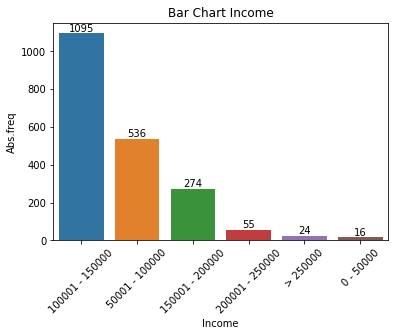

In [44]:
plt.title('Bar Chart Income')
g = sns.barplot(data=df_Income, x="Income", y="Abs.freq")
plt.xticks(rotation=45)
for i in g.containers:
    g.bar_label(i,)

##### Occupation

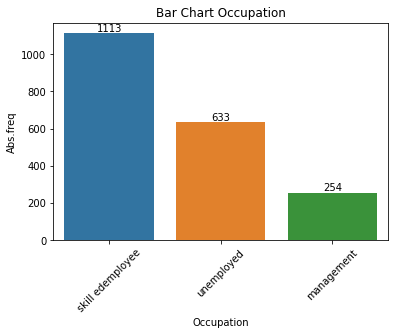

In [45]:
plt.title('Bar Chart Occupation')
g = sns.barplot(data=df_Occupation, x="Occupation", y="Abs.freq")
plt.xticks(rotation=45)
for i in g.containers:
    g.bar_label(i,)

##### Settlement Size

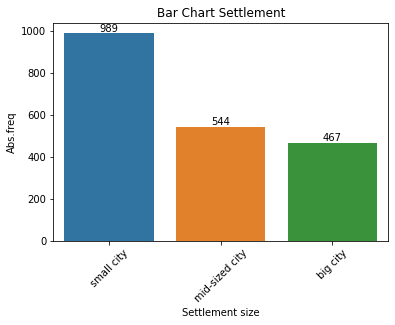

In [46]:
plt.title('Bar Chart Settlement')
g = sns.barplot(data=df_Settlement, x="Settlement size", y="Abs.freq")
plt.xticks(rotation=45)
for i in g.containers:
    g.bar_label(i,)

#### Histogram

##### Age

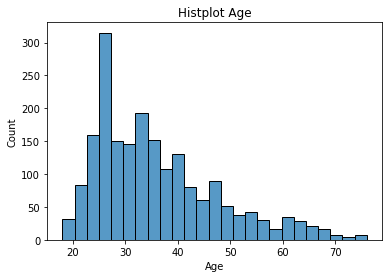

In [47]:
plt.title('Histplot Age')
sns.histplot(df.Age)
plt.show()

##### Income

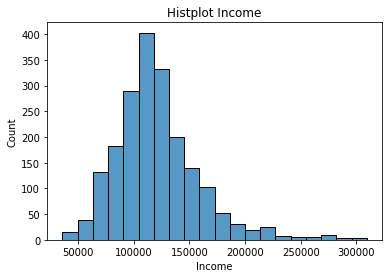

In [48]:
plt.title('Histplot Income')
sns.histplot(df.Income, bins = 20)
plt.show()

### Univariate Statistic

#### Location Statistic

In [49]:
df_info.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [50]:
LocStat = df[['Age','Income']].describe().to_dict()
info = pd.DataFrame.from_dict(LocStat, orient='index')
info['mode'] = [df['Age'].mode().to_list()[0], df['Income'].mode()[16]]
dis = info.copy()
info.rename(columns={"mean": "average", "25%": "first quartile", '50%' : 'median', '75%': "third quartile"}, inplace= True)
info = info[['min', 'max', 'average', 'mode', 'first quartile', 'median', 'third quartile']].T
info.head(10)

,Age,Income
min,18.000,35832.000
max,76.000,309364.000
average,35.909,120954.419
mode,26.000,171052.000
first quartile,27.000,97663.250
median,33.000,115548.500
third quartile,42.000,138072.250


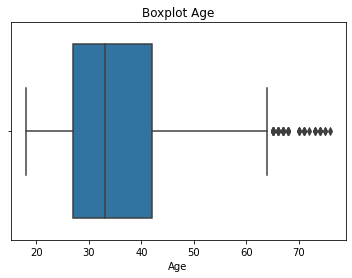

In [51]:
plt.title('Boxplot Age')
sns.boxplot(x = 'Age', data = df)
plt.show()

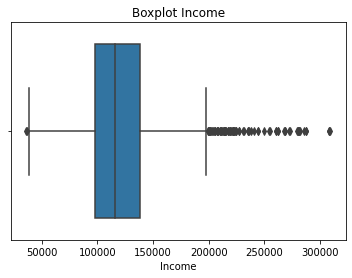

In [52]:
plt.title('Boxplot Income')
sns.boxplot(x = 'Income', data = df)
plt.show()

#### Dispersion Statistic

In [53]:
DisStat = pd.DataFrame()
DisStat['Amplitude'] = dis['max'] - dis['min']
DisStat['Interquartile range'] = dis['75%'] - dis['25%']
DisStat['MAD'] = df[['Age', 'Income']].mad().to_list()
DisStat['S'] = [np.std(df['Age']), np.std(df['Income'])]
DisStat.T.head()

,Age,Income
Amplitude,58.000000,273532.000000
Interquartile range,15.000000,40409.000000
MAD,9.316713,27959.467632
S,11.716472,38099.296281


## Multivariate Analytics

### Corr Plot

<Axes: >

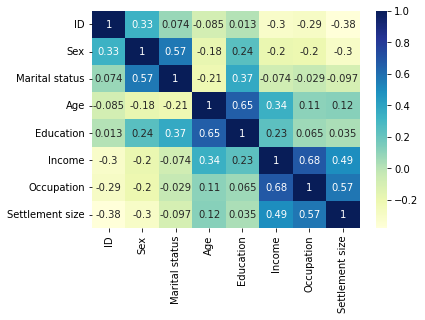

In [54]:
sns.heatmap(df_info.corr(), cmap="YlGnBu", annot=True)

### Scatter Plot

<Axes: xlabel='Income', ylabel='Age'>

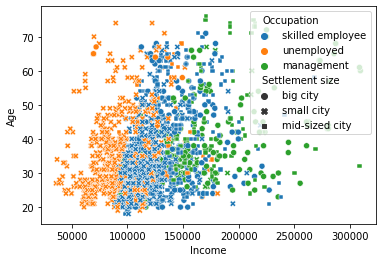

In [55]:
sns.scatterplot(
    data=df, y="Age", x="Income", style="Settlement size", hue="Occupation", legend="full"
)

<Axes: xlabel='Income', ylabel='Age'>

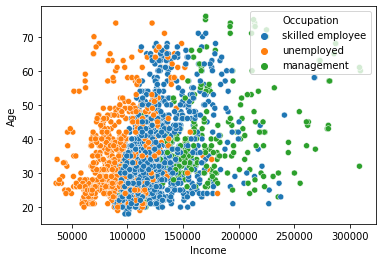

In [56]:
sns.scatterplot(
    data=df, y="Age", x="Income", hue="Occupation", legend="full"
)

<Axes: xlabel='Income', ylabel='Age'>

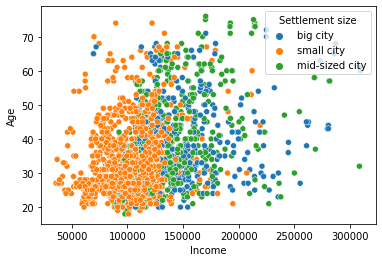

In [57]:
sns.scatterplot(
    data=df, y="Age", x="Income", hue="Settlement size", legend="full"
)

### Boxplot

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

boxplot = df[['Age', 'Income']]
boxplot[['Age', 'Income']] = scaler.fit_transform(boxplot[['Age', 'Income']])

<ipython-input-58-919264086e25>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot[['Age', 'Income']] = scaler.fit_transform(boxplot[['Age', 'Income']])


<Axes: >

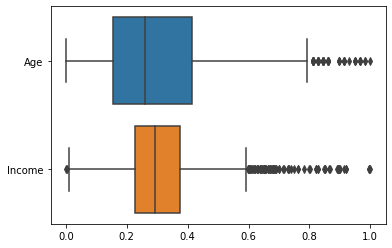

In [59]:
sns.boxplot(boxplot, orient='h')

# END